# Recognizing hand-written digits with neural networks

**Neural network Python libraries**
- *Keras*: High level library based on Tensorflow (or others) that is easy to use and flexible enough for most standard users. It has a great documentation and online support. 
- *Tensorflow*: Google's neural network library. Most widely used in ML research. Flexible and powerful but also (unnecessarily?) complicated.
- *Pytorch*: The newcomer developed by Facebook. Flexible like Tensorflow but with a nicer, more Pythonic API.

In this notebook we will tackle a classification task, recognizing hand-written digits of the famous MNIST dataset.

In [2]:
%matplotlib inline
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import *
from keras.optimizers import SGD, Adam
from keras.models import Sequential
from keras.utils import to_categorical

In [3]:
np.random.seed(42)

## MNIST - Preparing and exploring the data

Keras has a handy function to download the entire MNIST dataset which consists of 60,000 training images and 10000 test images.

In [6]:
(x_trn, y_trn), (x_test, y_test) = keras.datasets.mnist.load_data()

In [7]:
x_trn.shape, y_trn.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

**STOP!** What are training, validation and test sets?

- Training set: Data used to optimize the machine learning algorithm
- Validation set: Data used to independently verify the skill of the algorithm
- Test set: Another independent set used for *final* verification.

In [8]:
def plots(xs, ys):
    nfigs = xs.shape[0]; ncols = min(3, nfigs); nrows = int(np.floor(nfigs / ncols))
    fig, axs = plt.subplots(nrows, ncols, figsize=(3*ncols, 3*nrows))
    for i, ax in enumerate(axs.flat):
        ax.imshow(xs[i], cmap='gray')
        ax.set_title(str(ys[i]))
        ax.set_xticks([]); ax.set_yticks([])

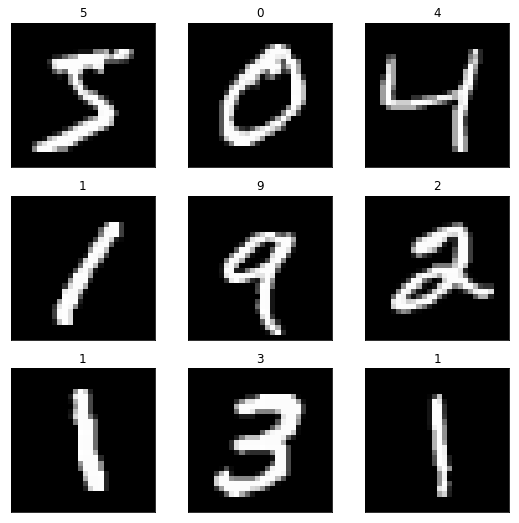

In [9]:
plots(x_trn[:9], y_trn[:9])

For gradient descent to work efficiently it is important that all the input variables or features are roughly on the same order of magnitude. Typically, we try to get them around 1.

In [11]:
def normalize(x): return x / 255

A very common method of normalizing is to subtract the mean and divide by the standard deviation.

But remember: Always normalize your training and validation/test set in the exact same way.

In [12]:
x_trn = normalize(x_trn)
x_test = normalize(x_test)

In [13]:
x_trn[0, 12:15, 12:15]

array([[ 0.74509804,  0.99215686,  0.2745098 ],
       [ 0.1372549 ,  0.94509804,  0.88235294],
       [ 0.        ,  0.31764706,  0.94117647]])

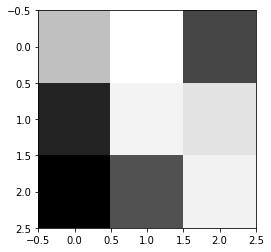

In [14]:
plt.imshow(x_trn[0, 12:15, 12:15], cmap='gray');

Now we will do something pretty dumb. We will flatten out the images and throw away all spatial information.

In [20]:
def flatten(x): return x.reshape(x.shape[0], -1)

In [18]:
x_trn_flat = flatten(x_trn)
x_test_flat = flatten(x_test)

In [19]:
x_trn_flat.shape

(60000, 784)

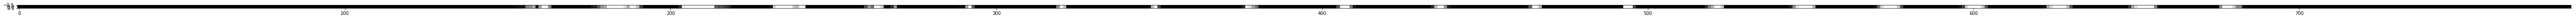

In [21]:
fig = plt.figure(figsize=(100, 1))
plt.imshow(x_trn_flat[0, None, :], cmap='gray');

We are dealing with a classification problem. That means that the correct answer to always one of 10 classes. To pass the numbers to the neural net we one-hot encode the labels.

In [22]:
yoh_trn = to_categorical(y_trn)
yoh_test = to_categorical(y_test)

In [23]:
y_trn[:3], yoh_trn[:3]

(array([5, 0, 4], dtype=uint8),
 array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]]))

## Training a simple linear network

To start, let's train a simple linear network.

In [24]:
linear_model = Sequential([
    Dense(10, input_shape=(784,), activation='softmax'),
])

After the matrix multiplication we are using a Softmax layer.

In [25]:
def softmax(x):
    np.exp(x) / np.sum(np.exp(x))

In [26]:
z = [2, 6, 3, 5]

In [27]:
np.exp(z)

array([   7.3890561 ,  403.42879349,   20.08553692,  148.4131591 ])

In [29]:
out = np.exp(z) / np.sum(np.exp(z))
out, out.sum()

(array([ 0.01275478,  0.69638749,  0.03467109,  0.25618664]), 1.0)

Next we need to judge how good our predictions is. For classification we use the categorical crossentropy:

$L = - \sum_c y_t^c \log(y_p^c)$

$c$ is the class, so one of our ten numbers.

In [30]:
linear_model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [31]:
linear_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [32]:
linear_model.fit(x_trn_flat, yoh_trn, batch_size=512, epochs=10, 
                 validation_data=(x_test_flat, yoh_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 30us/step - loss: 1.1325 - acc: 0.7209 - val_loss: 0.6289 - val_acc: 0.8602
Epoch 2/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.5469 - acc: 0.8677 - val_loss: 0.4542 - val_acc: 0.8921
Epoch 3/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.4380 - acc: 0.8879 - val_loss: 0.3887 - val_acc: 0.9027
Epoch 4/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.3885 - acc: 0.8979 - val_loss: 0.3555 - val_acc: 0.9075
Epoch 5/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.3597 - acc: 0.9043 - val_loss: 0.3337 - val_acc: 0.9104
Epoch 6/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.3403 - acc: 0.9085 - val_loss: 0.3197 - val_acc: 0.9133
Epoch 7/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.3262 - acc: 0.9120 - val_loss: 0.3085 - val_acc

In [33]:
preds = linear_model.predict(x_test_flat, 4096)

In [34]:
preds[:3], preds.shape

(array([[  8.50621655e-05,   9.95888172e-08,   1.46716702e-04,
           3.93172167e-03,   8.01397073e-06,   6.86776330e-05,
           5.97670805e-07,   9.94246185e-01,   1.02001126e-04,
           1.41091016e-03],
        [  1.07238267e-03,   3.44449327e-05,   9.75923598e-01,
           4.63832729e-03,   1.47645651e-09,   6.60345703e-03,
           1.08857080e-02,   2.70232337e-10,   8.41891393e-04,
           9.27855552e-08],
        [  4.55608068e-04,   9.43925381e-01,   1.86355170e-02,
           7.96427485e-03,   1.03008677e-03,   2.28548911e-03,
           5.09562204e-03,   6.02205051e-03,   1.24387760e-02,
           2.14718608e-03]], dtype=float32), (10000, 10))

In [30]:
num_preds = np.argmax(preds, axis=1); num_preds[:3]

array([7, 2, 1], dtype=int64)

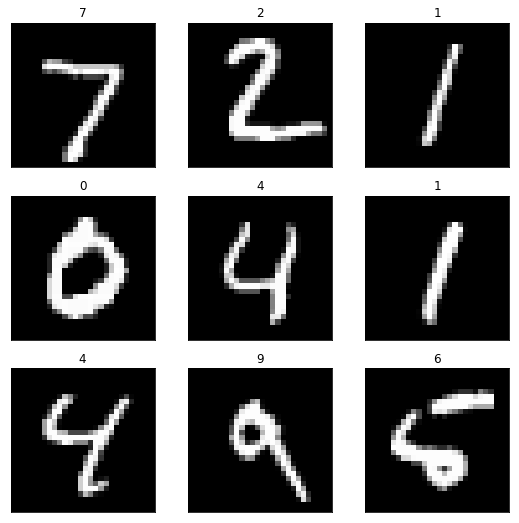

In [31]:
plots(x_test[:9].reshape(-1, 28, 28), num_preds[:9])

## A neural network

A neural network consists of several layers, connected by matrix multiplications. Layers between the input and output layer are called hidden layers. The activations in these layers are passed through a non-linear activation function.

Neural networks can approximate any non-linear function: http://neuralnetworksanddeeplearning.com/chap4.html

In [42]:
neural_net = Sequential([
    Dense(256, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax'),
])

In [43]:
neural_net.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [44]:
neural_net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [45]:
neural_net.fit(x_trn_flat, yoh_trn, batch_size=512, epochs=10, 
               validation_data=(x_test_flat, yoh_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.4834 - acc: 0.8727 - val_loss: 0.2430 - val_acc: 0.9290
Epoch 2/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.2088 - acc: 0.9415 - val_loss: 0.1749 - val_acc: 0.9488
Epoch 3/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.1560 - acc: 0.9561 - val_loss: 0.1451 - val_acc: 0.9577
Epoch 4/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.1236 - acc: 0.9652 - val_loss: 0.1203 - val_acc: 0.9647
Epoch 5/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.1023 - acc: 0.9721 - val_loss: 0.1053 - val_acc: 0.9675
Epoch 6/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.0853 - acc: 0.9764 - val_loss: 0.0964 - val_acc: 0.9701
Epoch 7/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.0725 - acc: 0.9799 - val_loss: 0.0878 - val_acc

### Deep neural networks

In [61]:
deep_net = Sequential([
    Dense(256, input_shape=(784,), activation='relu'),
    Dropout(0.25),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax'),
])

In [62]:
deep_net.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [63]:
deep_net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 10)                2570      
Total para

In [64]:
deep_net.fit(x_trn_flat, yoh_trn, batch_size=512, epochs=10, 
             validation_data=(x_test_flat, yoh_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.5880 - acc: 0.8156 - val_loss: 0.1670 - val_acc: 0.9484
Epoch 2/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.2005 - acc: 0.9406 - val_loss: 0.1178 - val_acc: 0.9625
Epoch 3/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.1439 - acc: 0.9570 - val_loss: 0.0935 - val_acc: 0.9698
Epoch 4/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.1134 - acc: 0.9662 - val_loss: 0.0834 - val_acc: 0.9736
Epoch 5/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.0965 - acc: 0.9710 - val_loss: 0.0792 - val_acc: 0.9773
Epoch 6/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.0836 - acc: 0.9749 - val_loss: 0.0716 - val_acc: 0.9775
Epoch 7/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.0727 - acc: 0.9784 - val_loss: 0.0711 - va

## Convolutions

To take advantage of the spatial information in images we can use convolutions rather than fully connected layers.

http://setosa.io/ev/image-kernels/

In [65]:
conv_net = Sequential([
    Conv2D(32, kernel_size=5, strides=2, activation='relu', padding='same', 
           input_shape=(28, 28, 1)),
    Conv2D(64, kernel_size=3, strides=2, activation='relu', padding='same'),
    Conv2D(128, kernel_size=3, strides=2, activation='relu', padding='same'),
    Flatten(),
    Dense(10, activation='softmax'),
])

In [66]:
conv_net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 10)                20490     
Total params: 113,674
Trainable params: 113,674
Non-trainable params: 0
_________________________________________________________________


In [67]:
conv_net.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [68]:
conv_net.fit(x_trn.reshape(-1, 28, 28, 1), yoh_trn, batch_size=512, epochs=10, 
             validation_data=(x_test.reshape(-1, 28, 28, 1), yoh_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 46s 759us/step - loss: 0.5539 - acc: 0.8495 - val_loss: 0.1890 - val_acc: 0.9424
Epoch 2/10
60000/60000 [==============================] - 52s 864us/step - loss: 0.1451 - acc: 0.9573 - val_loss: 0.0968 - val_acc: 0.9700
Epoch 3/10
60000/60000 [==============================] - 51s 850us/step - loss: 0.0865 - acc: 0.9742 - val_loss: 0.0767 - val_acc: 0.9756
Epoch 4/10
60000/60000 [==============================] - 51s 858us/step - loss: 0.0643 - acc: 0.9804 - val_loss: 0.0546 - val_acc: 0.9824
Epoch 5/10
60000/60000 [==============================] - 54s 903us/step - loss: 0.0529 - acc: 0.9842 - val_loss: 0.0485 - val_acc: 0.9849
Epoch 6/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0436 - acc: 0.9862 - val_loss: 0.0459 - val_acc: 0.9851
Epoch 7/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0362 - acc: 0.9891 - val_loss: 0.0440

## End